In [1]:
import tweepy
import pandas as pd
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
api_key = "rfYVLXa4yk69XmQAEguZY8Ato"
api_secret_key = "ovD6e58xyNcvW5z8TVQeBlgfbdGnPFlLjVasjaJtknrwBlGWoF"
bearer_token = "AAAAAAAAAAAAAAAAAAAAAEGZRAEAAAAAPria60%2B6XiaMi4NrNltlz9fxEPU%3D34PJMbCvyQOf3UYetsJ2ZJwGrdbVJjNuaxIbLF12nh7sAjCowm"
access_token = "1327941514459185152-i80iUVoYArufdvvGwWqmHI9Jku7NGI"
access_token_secret = "IqoWRP3gWQjDIlqgSDlSlBSnovoTBJNqs6KGttZRpxqLY"

In [3]:
auth = tweepy.OAuthHandler(api_key,api_secret_key)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

In [4]:
searchfile = api.search(q="upaya vaksinasi -filter:retweets",lang="id",count=250,tweet_mode="extended")

In [5]:
for tweet in searchfile[0:5]:
    print(tweet.full_text + '\n')

Kovid 19 harus dilawan, upaya penerapan Pemberlakuan Pembatasan Kegiatan Masyarakat (PPKM) sudah tepat, ini salah satu cara untuk memutus mata rantai penyebaran virus Kovid 19..
Terlebih lagi mari disiplin prokes dan turut ambil bagian program Vaksinasi nasional https://t.co/Pl6QrKGQgC

Pemkot Surabaya menyediakan beberapa upaya terkait dengan teknis pendaftaran vaksinasi Covid-19 untuk anak usia 12-17 tahun sambil menunggu instruksi lanjutan. #vaksinasiCovid-19 https://t.co/UrTjpsvWXo

DPW PKS Jawa Timur mengajak kader, simpatisan dan masyarakat menyukseskan pelaksanaan PPKM darurat beserta program vaksinasi sebagai upaya pengendalian COVID-19.

https://t.co/Lmvf07chAd

@Kita_AMLTF AKU PATUH PPKM DEMI INDONESIA SEHAT DAN MAJU

Kepatuhan menjalani PPKM &amp; protokol kesehatan jadi upaya melindungi kberlangsungan usaha, juga kselamatan &amp; ksehatan pekerja dtempat kerja. yuk sllu patuhi protokol ksehatan &amp; sgr lakukan vaksinasi utk mgurangi resiko penularan covid

Semakin dekat d

In [6]:
tweets = []
users = []
for tweet in searchfile:
    tweet_usr = tweet.full_text
    username = tweet.user.screen_name
    tweets.append(tweet_usr)
    users.append(username)
data_tweet = list(zip(users, tweets))

In [7]:
#create Dataframe
df_content = pd.DataFrame(data_tweet , columns=['UserName','Tweet'])
df_content.head()

UserName                                              Tweet
0    DevitaYani_Y  Kovid 19 harus dilawan, upaya penerapan Pember...
1         jpnncom  Pemkot Surabaya menyediakan beberapa upaya ter...
2  antarajatimcom  DPW PKS Jawa Timur mengajak kader, simpatisan ...
3     Sevensix776  @Kita_AMLTF AKU PATUH PPKM DEMI INDONESIA SEHA...
4         AlfanRK  Semakin dekat dengan kita! Mari kita taati Pro...

In [8]:
def cleaning_txt(text):
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    text = re.sub(r'RT[\s]+','',text)
    return text

In [9]:
df_content['Tweet'] = df_content['Tweet'].apply(cleaning_txt)
df_content.drop_duplicates(subset='Tweet',inplace=True)

In [10]:
df_content.head()

UserName                                              Tweet
0    DevitaYani_Y  Kovid 19 harus dilawan upaya penerapan Pemberl...
1         jpnncom  Pemkot Surabaya menyediakan beberapa upaya ter...
2  antarajatimcom  DPW PKS Jawa Timur mengajak kader simpatisan d...
3     Sevensix776  AMLTF AKU PATUH PPKM DEMI INDONESIA SEHAT DAN ...
4         AlfanRK  Semakin dekat dengan kita Mari kita taati Prok...

In [11]:
def Polarity(text):
    analysis = TextBlob(text)
    try:
        analysis = analysis.translate(to="en")
    except Exception as e:
        print(e)
    return analysis.sentiment.polarity

In [12]:
df_content['Polarity'] = df_content['Tweet'].apply(Polarity)

In [13]:
df_content.head()

UserName                                              Tweet  Polarity
0    DevitaYani_Y  Kovid 19 harus dilawan upaya penerapan Pemberl...  0.285714
1         jpnncom  Pemkot Surabaya menyediakan beberapa upaya ter... -0.020000
2  antarajatimcom  DPW PKS Jawa Timur mengajak kader simpatisan d...  0.000000
3     Sevensix776  AMLTF AKU PATUH PPKM DEMI INDONESIA SEHAT DAN ...  0.450000
4         AlfanRK  Semakin dekat dengan kita Mari kita taati Prok... -0.100000

In [14]:
def analysis_classify(polarity_value):
    if polarity_value < 0:
        return 'Negative'
    elif polarity_value == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [15]:
df_content['Classify'] = df_content['Polarity'].apply(analysis_classify)

In [16]:
df_content

UserName                                              Tweet  \
0      DevitaYani_Y  Kovid 19 harus dilawan upaya penerapan Pemberl...   
1           jpnncom  Pemkot Surabaya menyediakan beberapa upaya ter...   
2    antarajatimcom  DPW PKS Jawa Timur mengajak kader simpatisan d...   
3       Sevensix776  AMLTF AKU PATUH PPKM DEMI INDONESIA SEHAT DAN ...   
4           AlfanRK  Semakin dekat dengan kita Mari kita taati Prok...   
..              ...                                                ...   
93      Kangsoleh92  Bentuk upaya penanganan pandemi presiden tinja...   
94     zorosensei99  Bentuk upaya penanganan pandemi kopet yang mas...   
96  republikaonline  Nakes menyuntikan vaksin Covid 19 kepada pelaj...   
97  republikaonline  Vaksinasi dilakukan di sekolah DKI Jakarta seb...   
99      GarudaCares  Sebagai informasi dalam upaya mendukung progra...   

    Polarity  Classify  
0   0.285714  Positive  
1  -0.020000  Negative  
2   0.000000   Neutral  
3   0.450000  Positive  
4  -0.100000  Negative  
..       ...       ...  
93  0.200000  Positive  
94  0.200000  Positive  
96  0.000000   Neutral  
97  0.000000   Neutral  
99  0.400000  Positive  

[90 rows x 4 columns]

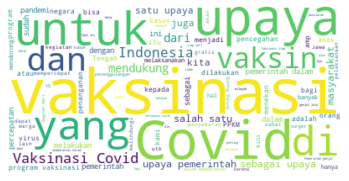

In [27]:
allwords = ' '.join([Tweet for Tweet in df_content['Tweet']])
wordCloud = WordCloud(background_color="white",max_words=100,max_font_size=120).generate(allwords)

plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [46]:
positive_tweet = df_content[df_content.Classify == 'Positive']
percent_positive = len(positive_tweet)/len(df_content) * 100
print('Percentage',percent_positive,'%')

Percentage 50.0 %


In [47]:
negative_tweet = df_content[df_content.Classify == 'Negative']
percent_negative = len(negative_tweet)/len(df_content) * 100
print('Percentage',percent_negative,'%')

Percentage 13.333333333333334 %


In [48]:
netral_tweet = df_content[df_content.Classify == 'Neutral']
percent_netral = len(netral_tweet)/len(df_content) * 100
print('Percentage',percent_netral,'%')

Percentage 36.666666666666664 %


<function matplotlib.pyplot.show(close=None, block=None)>

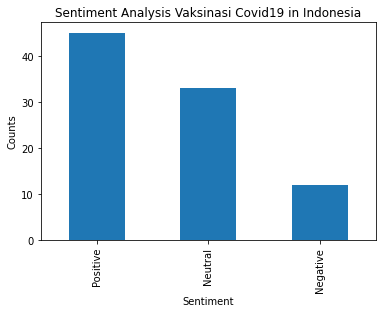

In [44]:
df_content['Classify'].value_counts()

plt.title('Sentiment Analysis Vaksinasi Covid19 in Indonesia')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_content['Classify'].value_counts().plot(kind='bar')
plt.show

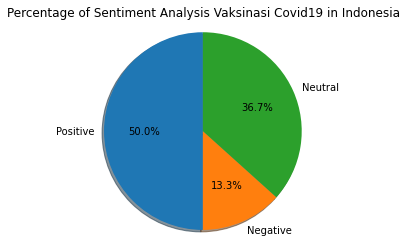

In [57]:
labels = df_content['Classify'].unique()
sizes = [percent_positive,percent_negative,percent_netral]
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90,shadow=True)
plt.title('Percentage of Sentiment Analysis Vaksinasi Covid19 in Indonesia')
plt.axis('equal')
plt.show()